# Credit Card Fraud
## Group 13
Nikita Chinchwade

Anuj Doshi

Chongwen Sun

## Introduction

With the emergence of cashless economies and a significant rise in the number of online transactions, credit cards have become the norm. Unfortunately, with this growth in the usage of credit cards, the chances of fraud and consequently the amount of losses have also increased drastically. Statistics show that credit card fraud losses may climb to as much as $10 billion in the United States alone by 2020.

This project focuses on analyzing transaction data to infer some meaningful insights about card fraud. The motivation for this analysis stems from the need to come up with better strategies to promote a safer economy. Though EMV chip cards make payments relatively safer, experts predict fraud will still remain a major concern in the future. If the existing data is not analyzed, it will be extremely difficult to decode fraud methodologies and in turn, almost impossible to adopt counter measures and promote a secure environment for transactions.


## Dataset Description

It is often difficult to find data related to credit card transactions online because of the sensitive nature of such information. Therefore, we obtained a synthetic dataset, generated by a simulator called PaySim. 

PaySim used real transactions implemented in an African country. Logs to create the dataset were provided by a multinational company later malicious behaviour was injected in it. This synthetic dataset was scaled down  to 1/4 of the original dataset and is available on the open source website, Kaggle.

It has the following attributes:

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps are 744 (30 days of simulation).

type - represents the type of transaction (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER).

amount - amount of the transaction in the local currency.

nameOrig - name of the customer who started the transaction.

oldbalanceOrg - initial balance before the transaction.

newbalanceOrig - new balance after the transaction.

nameDest - name of the customer who is the recipient of the transaction.

oldbalanceDest - initial balance recipient before the transaction. 

newbalanceDest - new balance recipient after the transaction. 

isFraud - transactions made by the fraudulent agents inside the simulation.

isFlaggedFraud - to control massive transfers from one account to another illegal attempts are flagged.



## Data processing Tasks

We have performed a number of data processing tasks throughout the notebook, to progressively increase the quality of our analyses.

1. The data set was highly unbalanced, with a large number of observations for legitimate transactrions (6,354,407) and very few observations (8213) for fraudulent transactions.Considering the huge size of the dataset, we chose to undersample the majority class using the resample module from sklearn.utils. 
2. In order to obtain a better visualization of the relationship between the amount feature and class of the transactions, we divided the data into bins using qcut on amount. We classified each amount into a low, medium, or high amount bin.
3. As mentioned earlier, data was provided for 30 days or 744 steps where each step represented an hour of time. To analyze the relationship between transaction class and the time of day, we assigned each transaction an hour of the day (between 0 and 23). Since there are 24 hours in a day, we achieved this by dividing the corresponding step by 24.
4. As is observed later, certain transactions had virtually zero instances of fraud. In order to obtain improved accuracy for the machine learning algorithms, we subsequently removed certain types of transactions (CASH_IN, DEBIT, PAYMENT) which were skewing our results.

## Data Acquisition and Cleaning - Undersampling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score



In [2]:
#import the dataset
df=pd.read_csv('CCData.csv')
df.head(30)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [4]:
#undersampling the dataset
y=df.isFraud
X=df.drop('isFraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=19)
X = pd.concat([X_train, y_train], axis=1)

fraud = X[X.isFraud==1]
notFraud = X[X.isFraud==0]
NFundersample = resample(notFraud,replace = False, n_samples = len(fraud),random_state = 19) 
underSample = pd.concat([NFundersample, fraud])
underSample.isFraud.value_counts()

1    6571
0    6571
Name: isFraud, dtype: int64

The modified dataset has a balanced proportion of legitimate and fraudulent transactions.

## Research Questions

We focussed on three research questions to better understand our data:

1.Does the type of transaction (PAYMENT, TRANSFER, CASH_OUT, CASH_IN, DEBIT) affect the number of fraudulent transactions to the number of legitimate transactions?

2.Classify the transactions into low, medium or high amount transactions. Create bins for the same. Determine if there is a relationship between transaction amount and proportion of fraudulent transactions.

3.What's the distribution of the fraudulent transaction during 744 steps(hours)?

## Research Question 1 
Does the type of transaction (PAYMENT, TRANSFER, CASH_OUT, CASH_IN, DEBIT) affect the number of fraudulent transactions to the number of legitimate transactions?

In [5]:
#create dummy variables for marking fraudulent and not fraudulent transaction
dummies=pd.get_dummies(underSample['isFraud'],prefix='isFraud')
dummies.head(10)

,isFraud_0,isFraud_1
5977425,1,0
6186910,1,0
2037241,1,0
4073097,1,0
707418,1,0
3833130,1,0
1745669,1,0
1113267,1,0
2991787,1,0
5323670,1,0


In [6]:
#concat dummies and column-'type'
underSample1=pd.concat([underSample['type'],dummies],axis=1)
underSample1.head(10)

,type,isFraud_0,isFraud_1
5977425,CASH_OUT,1,0
6186910,PAYMENT,1,0
2037241,TRANSFER,1,0
4073097,CASH_IN,1,0
707418,CASH_OUT,1,0
3833130,CASH_OUT,1,0
1745669,PAYMENT,1,0
1113267,PAYMENT,1,0
2991787,CASH_OUT,1,0
5323670,CASH_OUT,1,0


In [7]:
#groupby column-'type' and sum the number of fraudulent and not fraudulent transaction
fk = underSample1.groupby('type').sum()
fk

,isFraud_0,isFraud_1
type,,
CASH_IN,1517.0,0.0
CASH_OUT,2256.0,3271.0
DEBIT,35.0,0.0
PAYMENT,2191.0,0.0
TRANSFER,572.0,3300.0


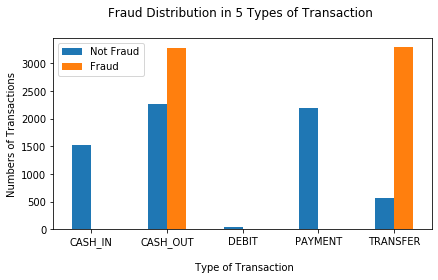

In [8]:
#visualization for fraudulent distribution in different payment types

fk.columns=['Not Fraud','Fraud']
fk[['Not Fraud','Fraud']].plot(kind='bar')
plt.tight_layout()
plt.title('Fraud Distribution in 5 Types of Transaction \n')
plt.xlabel('\n Type of Transaction')
plt.ylabel('Numbers of Transactions')
plt.xticks(rotation=0)

plt.show()

Fraudulent transactions only exist in two types of transaction, CASH_OUT and TRANSFER. 
This implies that fraudulent transactions only take place when cash is either withdrawn by a customer or funds are transferred between two customers of the service.

## Research Question 2
Classify the transactions into low, medium or high amount transactions. Create bins for the same. Determine if there is a relationship between transaction amount and proportion of fraudulent transactions.

In [9]:
#set bins for transaction amount 
underSample['bins']=pd.qcut(underSample['amount'], q=3, precision=0, labels=['low','medium','high'])
underSample.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,bins
5977425,407,CASH_OUT,181884.10,C1599479922,35270.00,0.00,C1039260789,7075510.96,7421915.08,0,0,medium
6186910,569,PAYMENT,1389.58,C482382055,45772.00,44382.42,M778775911,0.00,0.00,0,0,low
2037241,180,TRANSFER,1307300.66,C1963155061,0.00,0.00,C1108675046,9995279.07,11302579.73,0,0,high
4073097,300,CASH_IN,16032.64,C950571812,1199782.82,1215815.47,C2098154505,97322624.54,97306591.90,0,0,low
707418,37,CASH_OUT,110493.07,C448419293,0.00,0.00,C804475266,13816035.50,13926528.57,0,0,medium
3833130,282,CASH_OUT,166693.98,C1483794122,438893.91,272199.93,C339470009,10076440.72,10243134.71,0,0,medium
1745669,161,PAYMENT,5009.41,C365295710,25137.80,20128.39,M1459741747,0.00,0.00,0,0,low
1113267,130,PAYMENT,17063.57,C2097243366,0.00,0.00,M1762151612,0.00,0.00,0,0,low
2991787,232,CASH_OUT,174533.81,C1557577596,3049.00,0.00,C737040427,0.00,174533.81,0,0,medium
5323670,374,CASH_OUT,229545.30,C993819339,161503.00,0.00,C927276325,61576.20,291121.50,0,0,medium


In [10]:
#concat dummies and column-'bins'
new_underSample2=pd.concat([underSample['bins'],dummies],axis=1)
new_underSample2.head(10)

,bins,isFraud_0,isFraud_1
5977425,medium,1,0
6186910,low,1,0
2037241,high,1,0
4073097,low,1,0
707418,medium,1,0
3833130,medium,1,0
1745669,low,1,0
1113267,low,1,0
2991787,medium,1,0
5323670,medium,1,0


In [11]:
#groupby bins and sum the number of fraudulent and not fraudulent transaction
gk = new_underSample2.groupby('bins').sum()
gk

,isFraud_0,isFraud_1
bins,,
low,3271.0,1111.0
medium,2580.0,1799.0
high,720.0,3661.0


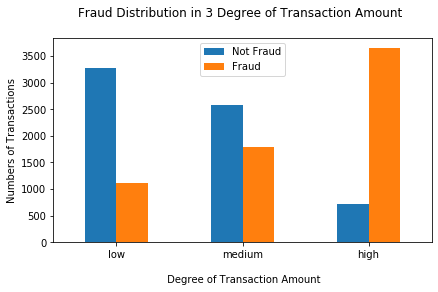

In [12]:
#visualization for fraudulent distribution in different transaction amount
gk.columns=['Not Fraud','Fraud']
gk[['Not Fraud','Fraud']].plot(kind='bar')
plt.tight_layout()
plt.title('Fraud Distribution in 3 Degree of Transaction Amount \n')
plt.xlabel('\n Degree of Transaction Amount')
plt.ylabel('Numbers of Transactions')
plt.xticks(rotation=0)
plt.show()

Higher amount transactions tend to be fraudulent transactions. This could be used to establish a threshold amount, beyond which accounts would be more prone to fraud. This in turn could help develop precautionary measures and prevention strategies for individuals with such accounts.

## Research Question 3
What's the distribution of the fraudulent transactions during 744 steps(hours)?

In [13]:
#calculate the remainder of the column-'step' by dividing 24
underSample['step_24h']=underSample['step']%24
underSample.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,bins,step_24h
5977425,407,CASH_OUT,181884.10,C1599479922,35270.00,0.00,C1039260789,7075510.96,7421915.08,0,0,medium,23
6186910,569,PAYMENT,1389.58,C482382055,45772.00,44382.42,M778775911,0.00,0.00,0,0,low,17
2037241,180,TRANSFER,1307300.66,C1963155061,0.00,0.00,C1108675046,9995279.07,11302579.73,0,0,high,12
4073097,300,CASH_IN,16032.64,C950571812,1199782.82,1215815.47,C2098154505,97322624.54,97306591.90,0,0,low,12
707418,37,CASH_OUT,110493.07,C448419293,0.00,0.00,C804475266,13816035.50,13926528.57,0,0,medium,13
3833130,282,CASH_OUT,166693.98,C1483794122,438893.91,272199.93,C339470009,10076440.72,10243134.71,0,0,medium,18
1745669,161,PAYMENT,5009.41,C365295710,25137.80,20128.39,M1459741747,0.00,0.00,0,0,low,17
1113267,130,PAYMENT,17063.57,C2097243366,0.00,0.00,M1762151612,0.00,0.00,0,0,low,10
2991787,232,CASH_OUT,174533.81,C1557577596,3049.00,0.00,C737040427,0.00,174533.81,0,0,medium,16
5323670,374,CASH_OUT,229545.30,C993819339,161503.00,0.00,C927276325,61576.20,291121.50,0,0,medium,14


In [14]:
#concat dummies and summed 24 steps
underSample3 = pd.concat([underSample['step_24h'],dummies],axis=1)
underSample3.head(10)

,step_24h,isFraud_0,isFraud_1
5977425,23,1,0
6186910,17,1,0
2037241,12,1,0
4073097,12,1,0
707418,13,1,0
3833130,18,1,0
1745669,17,1,0
1113267,10,1,0
2991787,16,1,0
5323670,14,1,0


In [15]:
#groupby summed 24 steps and sum the number of fraudulent and not fraudulent transaction 
pk = underSample3.groupby('step_24h').sum()
pk

,isFraud_0,isFraud_1
step_24h,,
0,60.0,239.0
1,21.0,299.0
2,9.0,302.0
3,3.0,259.0
4,4.0,221.0
5,0.0,303.0
6,2.0,285.0
7,9.0,266.0
8,27.0,297.0


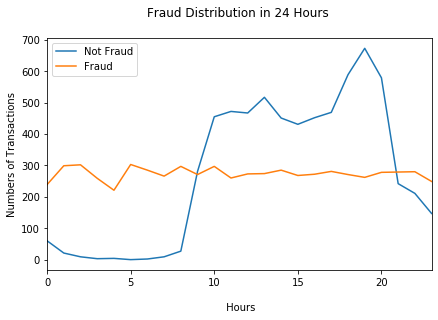

In [16]:
#visualization for fraudulent distribution during summed 24 steps.
pk.columns=['Not Fraud','Fraud']
pk[['Not Fraud','Fraud']].plot(kind='line')
plt.tight_layout()
plt.title('Fraud Distribution in 24 Hours \n')
plt.xlabel('\n Hours')
plt.ylabel('Numbers of Transactions')
plt.xticks(rotation=0)

plt.show()

Legal transactions are concentrated towards half a day, while fraudulent transactions are evenly distributed throughout the day. This is in contradiction to our original expectations; that fraudulent transactions would be concentrated within a particular time of day, possibly during the night. This implies that fraudsters could be at work any time of the day, and therefore there isn't a "best or safe" time to conduct transactions.

## Machine Learning: K-means Clustering and Logistic Regression

We decided to predict the class of the transactions using two machine learning algorithms and subsequently compare their performance.
1. K-means clustering
2. Logistic Regression

For both these algorithms, we use amount, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest as a part of the feature set. 80% of the data set is the training set and 20% is the test set. For both these methods, we first run the algorithms on the undersampled dataset and then on the updated undersampled dataset. The updated undersampled datasets consist of only those transaction types that consist of both legitimate and fraudulent transactions.

In [17]:
underSample.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,bins,step_24h
5977425,407,CASH_OUT,181884.10,C1599479922,35270.00,0.00,C1039260789,7075510.96,7421915.08,0,0,medium,23
6186910,569,PAYMENT,1389.58,C482382055,45772.00,44382.42,M778775911,0.00,0.00,0,0,low,17
2037241,180,TRANSFER,1307300.66,C1963155061,0.00,0.00,C1108675046,9995279.07,11302579.73,0,0,high,12
4073097,300,CASH_IN,16032.64,C950571812,1199782.82,1215815.47,C2098154505,97322624.54,97306591.90,0,0,low,12
707418,37,CASH_OUT,110493.07,C448419293,0.00,0.00,C804475266,13816035.50,13926528.57,0,0,medium,13
3833130,282,CASH_OUT,166693.98,C1483794122,438893.91,272199.93,C339470009,10076440.72,10243134.71,0,0,medium,18
1745669,161,PAYMENT,5009.41,C365295710,25137.80,20128.39,M1459741747,0.00,0.00,0,0,low,17
1113267,130,PAYMENT,17063.57,C2097243366,0.00,0.00,M1762151612,0.00,0.00,0,0,low,10
2991787,232,CASH_OUT,174533.81,C1557577596,3049.00,0.00,C737040427,0.00,174533.81,0,0,medium,16
5323670,374,CASH_OUT,229545.30,C993819339,161503.00,0.00,C927276325,61576.20,291121.50,0,0,medium,14


In [18]:
#Drop five categorical columns - 'nameOrig', 'nameDest', 'isFlaggedFraud', 'bins' and 'type'
underSample_drop_column = underSample.drop(['nameOrig', 'nameDest', 'isFlaggedFraud','type','bins'], axis = 1)

In [19]:
#Drop three transaction type without fraudulent transaction - 'PAYMENT', 'CASH_IN' and 'DEBIT'.
underSample_drop_column_row=underSample[(underSample.type != 'PAYMENT') & (underSample.type != 'CASH_IN')& (underSample.type != 'DEBIT')]
underSample_drop_column_row=underSample_drop_column_row.drop(['nameOrig', 'nameDest', 'isFlaggedFraud','type','bins'], axis = 1)

In [20]:
# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## k-means

In [21]:
def kmeans(df):
    # Split the data into train set and test set
    train,test = train_test_split(df,test_size=0.2,random_state=0)

    # Get the arrays of features and labels in train dataset
    feature_train = train.drop(['isFraud'],axis=1)
    feature_train = feature_train.values
    class_labels_train = pd.DataFrame(train[['isFraud']])
    class_labels_train = class_labels_train.values

    # Get the arrays of features and labels in test dataset
    feature_test = test.drop(['isFraud'],axis=1)
    feature_test = feature_test.values
    class_labels_test = pd.DataFrame(test[["isFraud"]])
    class_labels_test = class_labels_test.values

    # Normalize the features in both train and test dataset
    feature_train = normalize(feature_train)
    feature_test = normalize(feature_test)

    k_model = KMeans(n_clusters=2,random_state=0)
    k_model.fit(feature_train)
    class_labels_train_predicted = k_model.predict(feature_train)
    class_labels_test_predicted = k_model.predict(feature_test)

    # Scoring kmeans
    labels = [0,1]
    target_names = ['Not Fraud', 'Fraud']
    
    clf_report = classification_report(class_labels_test,
                                       class_labels_test_predicted,
                                       labels=labels,
                                       target_names=target_names,
                                       output_dict=True)
    # .iloc[:-1, :] to exclude support
    ax = plt.axes()
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, ax = ax, annot=True,cmap=plt.cm.Blues)
    ax.set_title('Classification Report \n K-means ')
    plt.show()
    
    # Calculating confusion matrix for kmeans  
    undersample_cm = confusion_matrix(class_labels_test, class_labels_test_predicted)
    actual_cm = confusion_matrix(class_labels_test, class_labels_test)
    class_labels = ['Not Fraud', 'Fraud']

    fig = plt.figure(figsize=(16,8))

    fig.add_subplot(223)
    plot_confusion_matrix(undersample_cm, class_labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

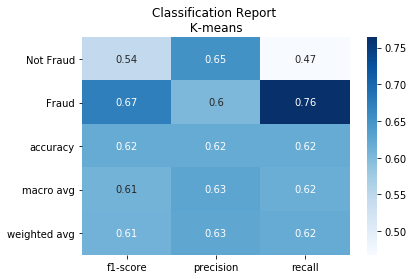

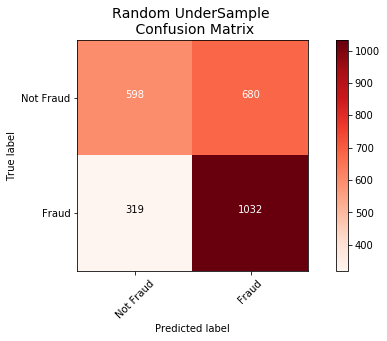

In [22]:
kmeans(underSample_drop_column)

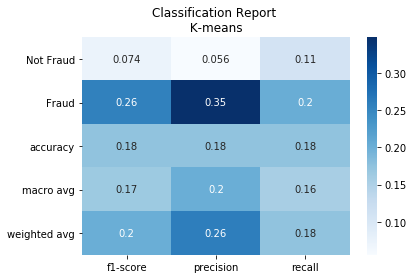

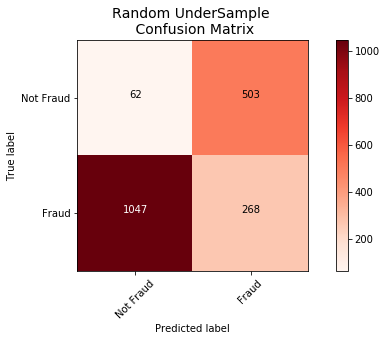

In [23]:
kmeans(underSample_drop_column_row)

Removing transactions that have no frauds (PAYMENT, CASH_IN, DEBIT), increases the accuracy of our results.

## Logistic Regression

In [24]:
#create a function for logistic regression
def regression(df):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('isFraud',axis=1), 
               df['isFraud'], test_size=0.20, 
                random_state=101)
    #create an instance and fit the model 
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    #predictions
    predict = log_model.predict(X_test)
    
    # Scoring logistic regression
    labels = [0,1]
    target_names = ['Not Fraud', 'Fraud']
    
    clf_report = classification_report(y_test,
                                       predict,
                                       labels=labels,
                                       target_names=target_names,
                                       output_dict=True)
    # .iloc[:-1, :] to exclude support
    ax = plt.axes()
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, ax = ax, annot=True,cmap=plt.cm.Blues)
    ax.set_title('Classification Report \n Logistic Regression ')
    plt.show()
    
    undersample_cm = confusion_matrix(y_test, predict)
    actual_cm = confusion_matrix(y_test, y_test)
    class_labels = ['Not Fraud', 'Fraud']

    fig = plt.figure(figsize=(16,8))

    fig.add_subplot(221)
    plot_confusion_matrix(undersample_cm, class_labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Greens)



//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


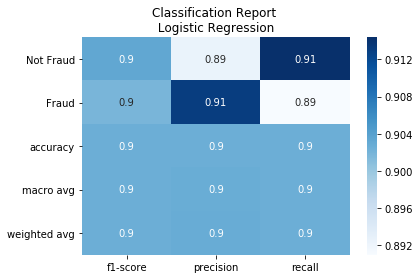

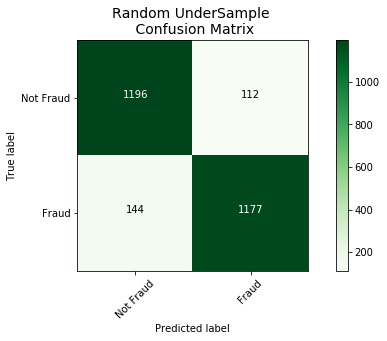

In [25]:
regression(underSample_drop_column)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


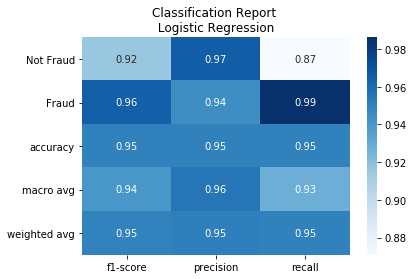

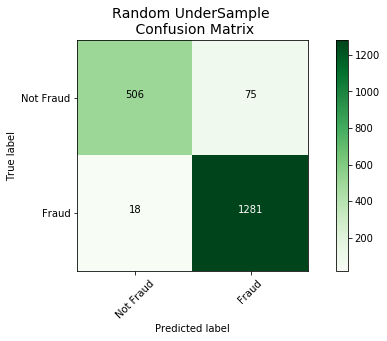

In [26]:
regression(underSample_drop_column_row)

Here again, removing transactions that have no frauds (PAYMENT, CASH_IN, DEBIT), increases the accuracy of our results since both classes (fraudulent and legitimate) are now better represented in the data.

By comparing the confusion matrices, we find that Logistic Regression is a significantly better way of analyzing this dataset. Since classification categorizes data into predefined class labels, logistic regression performs better than clustering (K-means) in applications involving prediction.

## Conclusion

We summarize our findings as follows:
1. Fraudulent transactions only exist in CASH_OUT and TRANSFER type of transactions.
2. Accounts with funds more than a particular threshold are a bigger target for fraudsters.
3. Fraudulent transactions can potentially occur during any time of the day.
4. Machine learning via logistic regression results in a higher accuracy rate for this data.

## References
1. https://www.kaggle.com/ntnu-testimon/paysim1
2. https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
3. http://bth.diva-portal.org/smash/get/diva2:955852/FULLTEXT06.pdf
4. https://scikit-learn.org/stable/